In [6]:
import pandas as pd

# Load data
df = pd.read_csv("../data/sales_raw.csv")

# view data
df.head()



,Order_ID,Order_Date,Product,Category,Region,Sales,Quantity,Profit
0,1001,05-01-2023,Laptop,Electronics,North,55000,1,8000
1,1002,07-01-2023,Mobile,Electronics,East,20000,2,3000
2,1003,10-01-2023,Chair,Furniture,West,7000,3,1500
3,1004,02-02-2023,Desk,Furniture,North,12000,1,2500
4,1005,05-02-2023,Tablet,Electronics,South,18000,1,4000


In [7]:
# Finding incomplete data
df.isnull().sum()


Order_ID      0
Order_Date    0
Product       0
Category      0
Region        0
Sales         0
Quantity      0
Profit        0
dtype: int64

In [8]:
# removing duplicates to avoid misleads in management decisions

df.drop_duplicates()

,Order_ID,Order_Date,Product,Category,Region,Sales,Quantity,Profit
0,1001,05-01-2023,Laptop,Electronics,North,55000,1,8000
1,1002,07-01-2023,Mobile,Electronics,East,20000,2,3000
2,1003,10-01-2023,Chair,Furniture,West,7000,3,1500
3,1004,02-02-2023,Desk,Furniture,North,12000,1,2500
4,1005,05-02-2023,Tablet,Electronics,South,18000,1,4000
5,1006,15-02-2023,Laptop,Electronics,West,55000,1,7500
6,1007,01-03-2023,Mobile,Electronics,North,21000,2,3500
7,1008,10-03-2023,Printer,Electronics,East,15000,1,2000
8,1009,12-03-2023,Chair,Furniture,South,7200,3,1600
9,1010,20-03-2023,Desk,Furniture,West,12500,1,2600


In [10]:
print(type('Order_Date'))

<class 'str'>


In [15]:
# making str to date&time and extracting month
# Making date usable for trend analysis

df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.month


In [16]:
df.head()

,Order_ID,Order_Date,Product,Category,Region,Sales,Quantity,Profit,Month
0,1001,2023-05-01,Laptop,Electronics,North,55000,1,8000,5
1,1002,2023-07-01,Mobile,Electronics,East,20000,2,3000,7
2,1003,2023-10-01,Chair,Furniture,West,7000,3,1500,10
3,1004,2023-02-02,Desk,Furniture,North,12000,1,2500,2
4,1005,2023-05-02,Tablet,Electronics,South,18000,1,4000,5


In [17]:
# Calculating overall revenue

df['Sales'].sum()

461400

In [24]:
# Understanding how sales change over time

monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales

Month
1      75000
2      82500
3      34500
4      20500
5     135900
6      18500
7      37500
10     49800
12      7200
Name: Sales, dtype: int64

In [23]:
#Finding best-performing products.

top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
top_products


Product
Laptop     220000
Mobile      83500
Tablet      54000
Printer     45300
Desk        37500
Name: Sales, dtype: int64

Text(0, 0.5, 'Sales')

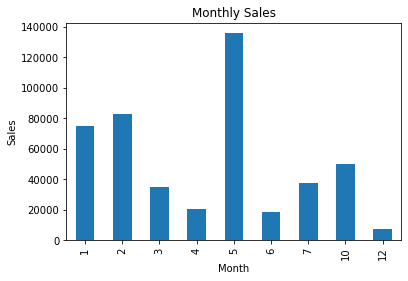

In [26]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind = 'bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

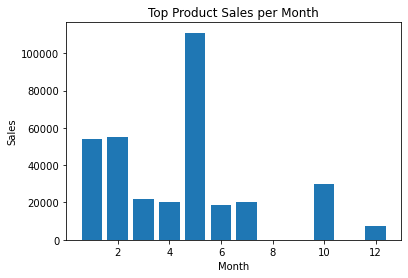

In [32]:
monthly_product_sales = (
    df.groupby(['Month', 'Product'])['Sales']
    .sum()
    .reset_index()
)
top_product_each_month = (
    monthly_product_sales
    .sort_values(['Month', 'Sales'], ascending=[True, False])
    .groupby('Month')
    .head(1)
)

plt.bar(top_product_each_month['Month'], top_product_each_month['Sales'])
plt.title("Top Product Sales per Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [35]:
df.to_csv("../data/sales_cleaned.csv", index=False)